In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree

In [2]:
decision_tree_df = pd.read_csv("./attrdataDecisionTree.csv")

In [3]:
decision_tree_df.head()

,Attrition,YrsExp,WorkChallenging,WorkEnvir,Compensation,TechExper,maritalstatus,education,children,ownhouse,loan
0,Yes,2.5,No,Low,Low,Excellent,married,undergraduate,no,no,no
1,No,2.0,Yes,Excellent,Excellent,Excellent,married,graduate,no,yes,yes
2,No,2.5,Yes,Excellent,Low,Excellent,single,graduate,no,yes,no
3,Yes,2.0,No,Excellent,Low,Excellent,married,graduate,no,yes,yes
4,No,2.0,Yes,Low,Low,Low,married,undergraduate,no,yes,no


In [4]:
decision_tree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition        208 non-null    object 
 1   YrsExp           208 non-null    float64
 2   WorkChallenging  208 non-null    object 
 3   WorkEnvir        208 non-null    object 
 4   Compensation     208 non-null    object 
 5   TechExper        208 non-null    object 
 6   maritalstatus    208 non-null    object 
 7   education        208 non-null    object 
 8   children         208 non-null    object 
 9   ownhouse         208 non-null    object 
 10  loan             208 non-null    object 
dtypes: float64(1), object(10)
memory usage: 18.0+ KB


In [5]:

attrition_transformed = LabelEncoder().fit_transform(decision_tree_df["Attrition"])
workChallenging_transformed = LabelEncoder().fit_transform(decision_tree_df["WorkChallenging"])
WorkEnvir_transformed = LabelEncoder().fit_transform(decision_tree_df["WorkEnvir"])
Compensation_transformed = LabelEncoder().fit_transform(decision_tree_df["Compensation"])
TechExper_transformed = LabelEncoder().fit_transform(decision_tree_df["TechExper"])
maritalstatus_transformed = LabelEncoder().fit_transform(decision_tree_df["maritalstatus"])
education_transformed = LabelEncoder().fit_transform(decision_tree_df["education"])
children_transformed = LabelEncoder().fit_transform(decision_tree_df["children"])
ownhouse_transformed = LabelEncoder().fit_transform(decision_tree_df["ownhouse"])
loan_transformed = LabelEncoder().fit_transform(decision_tree_df["loan"])

In [6]:
decision_tree_df["Attrition"] = attrition_transformed
decision_tree_df["WorkChallenging"] = workChallenging_transformed
decision_tree_df["WorkEnvir"] = WorkEnvir_transformed
decision_tree_df["Compensation"] = Compensation_transformed
decision_tree_df["TechExper"] = TechExper_transformed
decision_tree_df["maritalstatus"] = maritalstatus_transformed
decision_tree_df["education"] = education_transformed
decision_tree_df["children"] = children_transformed
decision_tree_df["ownhouse"] = ownhouse_transformed
decision_tree_df["loan"] = loan_transformed


In [7]:
decision_tree_df.head()

,Attrition,YrsExp,WorkChallenging,WorkEnvir,Compensation,TechExper,maritalstatus,education,children,ownhouse,loan
0,1,2.5,0,1,1,0,1,1,0,0,0
1,0,2.0,1,0,0,0,1,0,0,1,1
2,0,2.5,1,0,1,0,2,0,0,1,0
3,1,2.0,0,0,1,0,1,0,0,1,1
4,0,2.0,1,1,1,1,1,1,0,1,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    decision_tree_df.drop(columns=["Attrition"]), 
    decision_tree_df["Attrition"], 
    random_state= 1, 
    test_size=0.2)

In [9]:
simple_decision_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth= 5)
simple_decision_tree_model.fit(X= X_train, y= y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [10]:
y_predicted = simple_decision_tree_model.predict(X_test)

In [11]:
output_confusion_matrix = confusion_matrix(y_true= y_test, y_pred= y_predicted)
print(f"Confusion matrix of test data given below: \n{output_confusion_matrix}")

output_accuracy_score = accuracy_score(y_true= y_test, y_pred= y_predicted)
print(f"Accuracy Score of the test data: {output_accuracy_score}\n")

output_classification_report = classification_report(y_true= y_test, y_pred= y_predicted)
print(f"Classification Report of the test dataset is given below: \n{output_classification_report}")

Confusion matrix of test data given below: 
[[21  0]
 [ 0 21]]
Accuracy Score of the test data: 1.0

Classification Report of the test dataset is given below: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



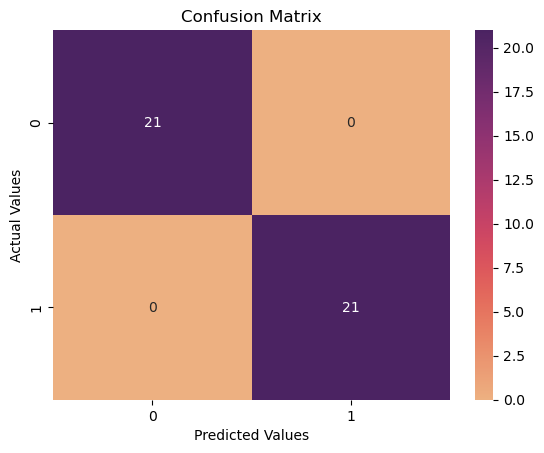

In [12]:
sns.heatmap(data= output_confusion_matrix, annot= True, cmap= "flare")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

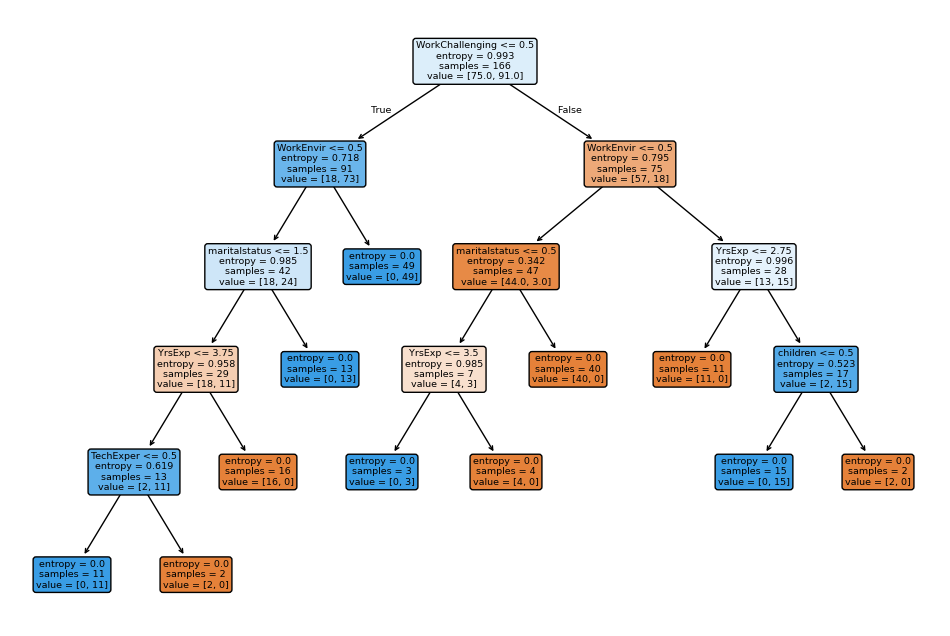

In [13]:
plt.figure(figsize=(12, 8))
tree.plot_tree(simple_decision_tree_model, 
          feature_names=X_train.columns,
          filled=True, 
          rounded=True)
plt.show()
